1.

In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#create X(drop target)
X = insurance.drop('charges', axis=1)

#create y(target)
y = insurance['charges']

In [5]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

2.

In [7]:
#check data dimensionality
insurance.shape

(1338, 7)

In [8]:
#general info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
#statistical summary
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Findings:
1. We have a target variable y, therefore supervised learning would be best for predictive analytics
2. y is continuous, therefore, the type of problem is regression.

3.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

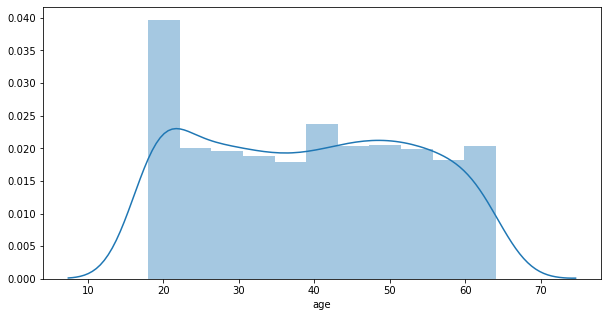

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(X['age'])

age follows a normal distribution

4.

In [12]:
#continuous and discrete columns
numerical_continuous = insurance.select_dtypes(include='float64').columns
numerical_discrete = insurance.select_dtypes(include='int64').columns

numerical_continuous

Index(['bmi', 'charges'], dtype='object')

In [13]:
numerical_discrete

Index(['age', 'children'], dtype='object')

5.

In [14]:
from scipy import stats

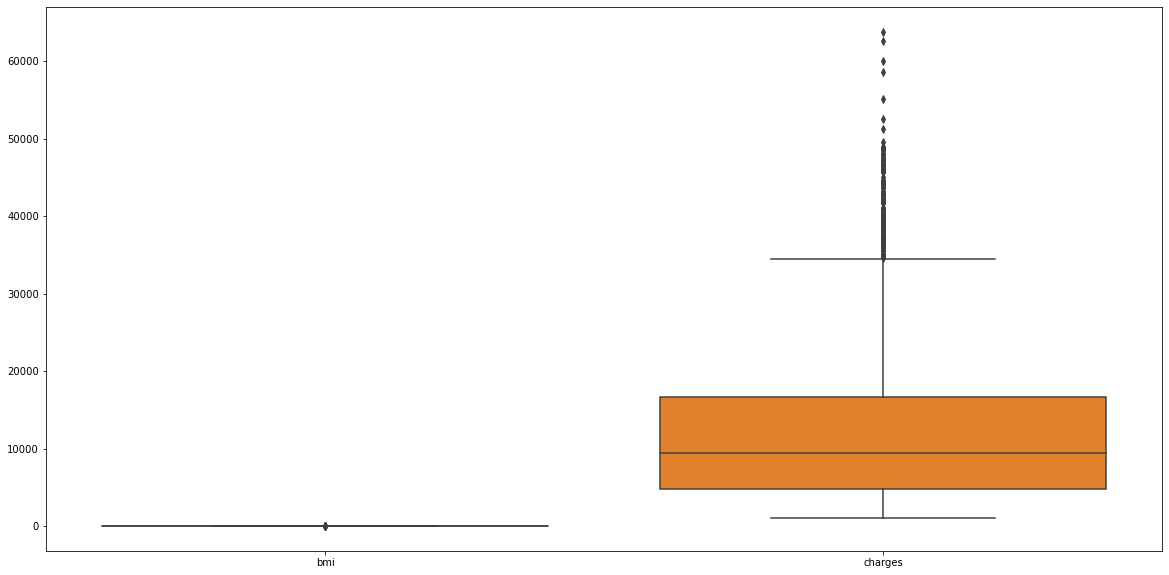

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=insurance[numerical_continuous])

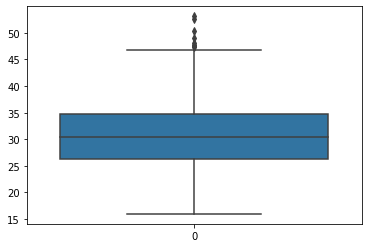

In [19]:
sns.boxplot(data=insurance['bmi'])

In [21]:
z = np.abs(stats.zscore(insurance[numerical_continuous]))
z

array([[0.45332   , 0.2985838 ],
       [0.5096211 , 0.95368917],
       [0.38330685, 0.72867467],
       ...,
       [1.0148781 , 0.96159623],
       [0.79781341, 0.93036151],
       [0.26138796, 1.31105347]])

In [45]:
threshold = 3
insurance[numerical_continuous]= insurance[numerical_continuous].where(z < 3)

In [46]:
insurance[numerical_continuous]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


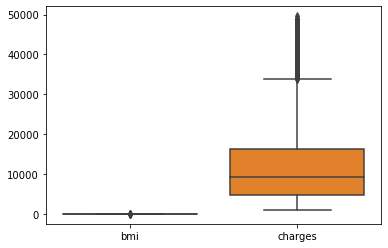

In [47]:
sns.boxplot(data=insurance[numerical_continuous])

7.

In [48]:
categorical = insurance.select_dtypes(include='object').columns
categorical

Index(['sex', 'smoker', 'region'], dtype='object')

In [50]:
pd.crosstab(insurance['sex'], insurance['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [57]:
pd.crosstab(insurance['region'], insurance['sex'])

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [56]:
pd.crosstab(insurance['region'], insurance['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


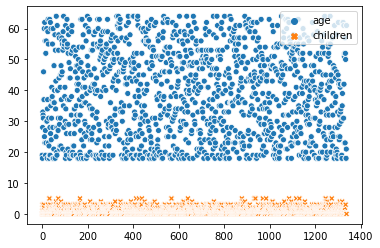

In [63]:
sns.scatterplot(data=insurance[numerical_discrete], hue='smoker')

In [53]:
from scipy.stats import chi2_contingency

In [55]:
chi_cat = chi2_contingency(pd.crosstab(insurance['smoker'], insurance['sex']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_cat[0], chi_cat[1]))

Chi2 Statistic: 7.39291081459996, p-value: 0.006548143503580696


p-value is less than 0.05 therefore gender and smoking are correlated

In [58]:
chi_cat_reg = chi2_contingency(pd.crosstab(insurance['smoker'], insurance['region']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_cat_reg[0], chi_cat_reg[1]))

Chi2 Statistic: 7.34347776140707, p-value: 0.06171954839170547


p-value is greater than 0.05 therefore region and smoking are not significantly correlated

10.

I'd drop region because of weak correlation to smoking feature